<h1>Analysing DVM-CAR Dataset</h1>

In [32]:
import pandas as pd

In [3]:
from efficient_apriori import apriori
import pandas as pd

In [31]:
data=pd.read_csv('ad_table.csv')
data


C:\Users\Saloni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,6.8L,Automatic,Petrol,21500,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,6.8L,Automatic,Petrol,28750,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,29999,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,6.8L,Automatic,Petrol,34948,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,6.8L,Automatic,Petrol,26555,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268250,Westfield,Sport,97_1,97_1$$1,2018,5,Yellow,2006.0,Convertible,1800,2.2L,Manual,Petrol,8750,2.0,NaN
268251,Westfield,Sport,97_1,97_1$$2,2018,5,Yellow,2006.0,Convertible,2009,NaN,Manual,NaN,7995,NaN,NaN
268252,Zenos,E10,99_1,99_1$$1,2018,3,Red,2016.0,Convertible,6,2.0L,Manual,Petrol,27950,2.0,NaN
268253,Zenos,E10,99_1,99_1$$2,2018,3,Green,2016.0,Convertible,1538,2.0L,Manual,Petrol,34950,2.0,NaN


In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Maker           0
Genmodel        0
Genmodel_ID     0
Adv_ID          0
Adv_year        0
Adv_month       0
Color           0
Reg_year        0
Bodytype        0
Runned_Miles    0
Engin_size      0
Gearbox         0
Fuel_type       0
Price           0
Seat_num        0
Door_num        0
dtype: int64

In [8]:
transactions = []
for index, row in data.iterrows():
    # Filter out NaN values and convert items to strings
    transaction = [str(item) for item in row if pd.notna(item) and item!=0 and str(item).isnumeric()==False]
    transactions.append(transaction)

In [9]:
itemsets_1, rules_1 = apriori(transactions, min_support=0.50, min_confidence=0.50)

In [10]:
itemsets_1

{1: {('5.0',): 198246, ('Manual',): 151746}, 2: {('5.0', 'Manual'): 127068}}

In [11]:
rules_1

[{Manual} -> {5.0}, {5.0} -> {Manual}]

In [12]:
data.columns

Index(['Maker', 'Genmodel', 'Genmodel_ID', 'Adv_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num'],
      dtype='object')

In [13]:
df1=data[["Maker","Color"]]

In [14]:
data.columns

Index(['Maker', 'Genmodel', 'Genmodel_ID', 'Adv_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num'],
      dtype='object')

In [15]:
df1

,Maker,Color
0,Bentley,Silver
1,Bentley,Grey
2,Bentley,Blue
3,Bentley,Green
4,Bentley,Grey
...,...,...
268245,Volvo,Grey
268246,Volvo,Blue
268247,Volvo,Silver
268248,Volvo,Silver


In [16]:
transactions = []
for index, row in df1.iterrows():
    # Filter out NaN values and convert items to strings
    transaction = [str(item) for item in row if pd.notna(item) and item!=0 and str(item).isnumeric()==False]
    transactions.append(transaction)

In [17]:
itemsets_2, rules_2 = apriori(transactions, min_support=0.02, min_confidence=0.02)

In [18]:
itemsets_2

{1: {('Silver',): 38730,
  ('Grey',): 36060,
  ('Blue',): 37056,
  ('Green',): 4791,
  ('Black',): 46772,
  ('White',): 32232,
  ('Red',): 25077,
  ('Citroen',): 8832,
  ('Fiat',): 6114,
  ('Ford',): 22912,
  ('Honda',): 4783,
  ('Hyundai',): 5956,
  ('Jaguar',): 7426,
  ('Kia',): 7572,
  ('Land Rover',): 8978,
  ('Mercedes-Benz',): 7969,
  ('Nissan',): 11477,
  ('Peugeot',): 9869,
  ('Renault',): 7033,
  ('Audi',): 19946,
  ('SKODA',): 5967,
  ('BMW',): 14782,
  ('Toyota',): 8617,
  ('Vauxhall',): 18011,
  ('Volkswagen',): 15366,
  ('Volvo',): 7158},
 2: {('Audi', 'Black'): 5062}}

In [19]:
rules_2

[{Black} -> {Audi}, {Audi} -> {Black}]

In [20]:
data

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,6.8L,Automatic,Petrol,21500,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,6.8L,Automatic,Petrol,28750,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,6.8L,Automatic,Petrol,29999,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,6.8L,Automatic,Petrol,34948,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,6.8L,Automatic,Petrol,26555,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268245,Volvo,V50,96_9,96_9$$522,2018,7,Grey,2008.0,Estate,140000,2.0L,Manual,Diesel,3185,5.0,5.0
268246,Volvo,V50,96_9,96_9$$523,2018,8,Blue,2007.0,Estate,158000,2.4L,Automatic,Diesel,2990,5.0,5.0
268247,Volvo,V50,96_9,96_9$$524,2018,5,Silver,2009.0,Estate,94000,2.4L,Automatic,Diesel,4250,5.0,5.0
268248,Volvo,V50,96_9,96_9$$525,2018,5,Silver,2004.0,Estate,111000,2.4L,Automatic,Petrol,2895,5.0,5.0


In [21]:
df3=data[data["Maker"]=="Audi"][["Maker", "Fuel_type","Gearbox","Seat_num","Bodytype"]]


In [22]:
df3

,Maker,Fuel_type,Gearbox,Seat_num,Bodytype
158478,Audi,Diesel,Manual,4.0,Convertible
158479,Audi,Diesel,Manual,4.0,Convertible
158480,Audi,Diesel,Automatic,4.0,Convertible
158481,Audi,Diesel,Automatic,4.0,Convertible
158482,Audi,Diesel,Manual,4.0,Convertible
...,...,...,...,...,...
180994,Audi,Petrol,Automatic,4.0,Coupe
180995,Audi,Diesel,Automatic,5.0,Hatchback
180996,Audi,Petrol,Automatic,4.0,Coupe
180997,Audi,Diesel,Automatic,4.0,Coupe


In [23]:
transactions = []
for index, row in df3.iterrows():
    # Filter out NaN values and convert items to strings
    transaction = [str(item) for item in row if pd.notna(item) and item!=0 and str(item).isnumeric()==False]
    transactions.append(transaction)

In [24]:
itemsets_3, rules_3 = apriori(transactions, min_support=0.05, min_confidence=0.05)

In [25]:
itemsets_3

{1: {('Audi',): 19946,
  ('Diesel',): 11635,
  ('Manual',): 8849,
  ('4.0',): 5116,
  ('Convertible',): 2042,
  ('Automatic',): 11094,
  ('Petrol',): 8287,
  ('Hatchback',): 4949,
  ('5.0',): 13206,
  ('Estate',): 2757,
  ('Saloon',): 3720,
  ('7.0',): 1105,
  ('SUV',): 4046,
  ('Coupe',): 2432},
 2: {('4.0', 'Audi'): 5116,
  ('4.0', 'Automatic'): 2434,
  ('4.0', 'Convertible'): 1622,
  ('4.0', 'Coupe'): 2287,
  ('4.0', 'Diesel'): 1985,
  ('4.0', 'Hatchback'): 1177,
  ('4.0', 'Manual'): 2682,
  ('4.0', 'Petrol'): 3128,
  ('5.0', 'Audi'): 13206,
  ('5.0', 'Automatic'): 7353,
  ('5.0', 'Diesel'): 8519,
  ('5.0', 'Estate'): 2743,
  ('5.0', 'Hatchback'): 3772,
  ('5.0', 'Manual'): 5850,
  ('5.0', 'Petrol'): 4666,
  ('5.0', 'SUV'): 2955,
  ('5.0', 'Saloon'): 3690,
  ('7.0', 'Audi'): 1105,
  ('7.0', 'Automatic'): 1105,
  ('7.0', 'Diesel'): 1094,
  ('7.0', 'SUV'): 1091,
  ('Audi', 'Automatic'): 11094,
  ('Audi', 'Convertible'): 2042,
  ('Audi', 'Coupe'): 2432,
  ('Audi', 'Diesel'): 11635,
  (

In [26]:
for i in itemsets_3:
    if i==5:
        print(itemsets_3[i])
        var=[]
        var=itemsets_3[i]

{('5.0', 'Audi', 'Automatic', 'Diesel', 'Estate'): 1290, ('5.0', 'Audi', 'Automatic', 'Diesel', 'SUV'): 1233, ('5.0', 'Audi', 'Automatic', 'Diesel', 'Saloon'): 1551, ('5.0', 'Audi', 'Diesel', 'Hatchback', 'Manual'): 1028, ('5.0', 'Audi', 'Diesel', 'Manual', 'Saloon'): 1114, ('5.0', 'Audi', 'Hatchback', 'Manual', 'Petrol'): 1162, ('7.0', 'Audi', 'Automatic', 'Diesel', 'SUV'): 1081}


In [27]:
var

{('5.0', 'Audi', 'Automatic', 'Diesel', 'Estate'): 1290,
 ('5.0', 'Audi', 'Automatic', 'Diesel', 'SUV'): 1233,
 ('5.0', 'Audi', 'Automatic', 'Diesel', 'Saloon'): 1551,
 ('5.0', 'Audi', 'Diesel', 'Hatchback', 'Manual'): 1028,
 ('5.0', 'Audi', 'Diesel', 'Manual', 'Saloon'): 1114,
 ('5.0', 'Audi', 'Hatchback', 'Manual', 'Petrol'): 1162,
 ('7.0', 'Audi', 'Automatic', 'Diesel', 'SUV'): 1081}

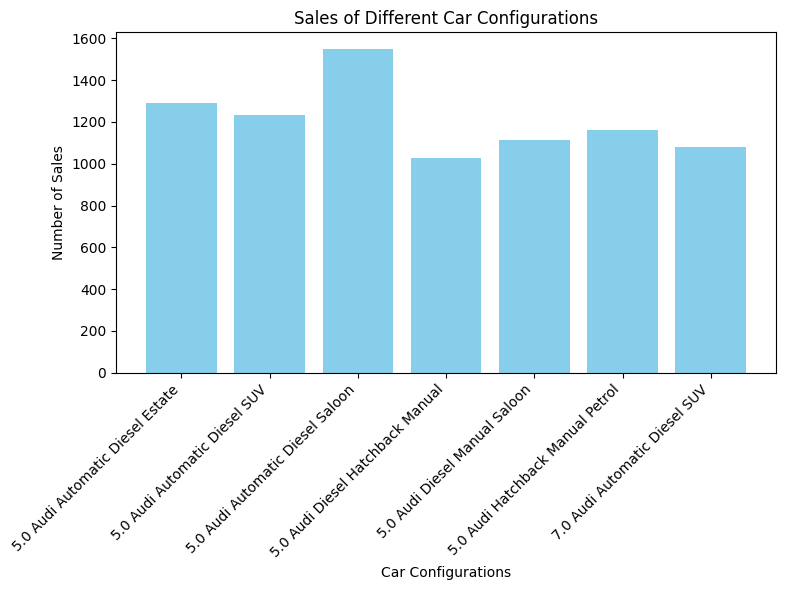

In [28]:
import matplotlib.pyplot as plt

data = var

# Extracting the y values
y_values = [value for value in data.values()]

# Creating a list of labels for the x-axis
x_labels = [f"{key[0]} {key[1]} {key[2]} {key[3]} {key[4]}" for key in data.keys()]

# Creating the bar graph
bar_width = 0.3  
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(x_labels, y_values, color='skyblue')
plt.xlabel('Car Configurations')
plt.ylabel('Number of Sales')
plt.title('Sales of Different Car Configurations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [29]:
rules_3

[{Audi} -> {4.0},
 {4.0} -> {Audi},
 {Automatic} -> {4.0},
 {4.0} -> {Automatic},
 {Convertible} -> {4.0},
 {4.0} -> {Convertible},
 {Coupe} -> {4.0},
 {4.0} -> {Coupe},
 {Diesel} -> {4.0},
 {4.0} -> {Diesel},
 {Hatchback} -> {4.0},
 {4.0} -> {Hatchback},
 {Manual} -> {4.0},
 {4.0} -> {Manual},
 {Petrol} -> {4.0},
 {4.0} -> {Petrol},
 {Audi} -> {5.0},
 {5.0} -> {Audi},
 {Automatic} -> {5.0},
 {5.0} -> {Automatic},
 {Diesel} -> {5.0},
 {5.0} -> {Diesel},
 {Estate} -> {5.0},
 {5.0} -> {Estate},
 {Hatchback} -> {5.0},
 {5.0} -> {Hatchback},
 {Manual} -> {5.0},
 {5.0} -> {Manual},
 {Petrol} -> {5.0},
 {5.0} -> {Petrol},
 {SUV} -> {5.0},
 {5.0} -> {SUV},
 {Saloon} -> {5.0},
 {5.0} -> {Saloon},
 {Audi} -> {7.0},
 {7.0} -> {Audi},
 {Automatic} -> {7.0},
 {7.0} -> {Automatic},
 {Diesel} -> {7.0},
 {7.0} -> {Diesel},
 {SUV} -> {7.0},
 {7.0} -> {SUV},
 {Automatic} -> {Audi},
 {Audi} -> {Automatic},
 {Convertible} -> {Audi},
 {Audi} -> {Convertible},
 {Coupe} -> {Audi},
 {Audi} -> {Coupe},
 {Dies

<h1>Conclusions</h1>

<ul><li>Ford’s most popular type is 5 seater, Manual gearbox, fuel type petrol and shape Hatchback.
Next most popular type is 5 seater, Manual Gearbox, fuel type diesel and shape Hatchback.</li>

<li>A 5 seater Audi , with automatic gearbox, fuel type diesel and body type Saloon is the most popular one. 

